In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from tensorflow.keras.datasets import mnist
from scipy.ndimage import shift

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

class_4_images = train_images[train_labels == 4][:100]
class_9_images = train_images[train_labels == 9][:100]
class_4_labels = np.zeros(len(class_4_images))
class_9_labels = np.ones(len(class_9_images))

def translate_images(images, pixels):
    translated_images = []
    for image in images:
        translated_image = shift(image, [0, pixels], cval=0, mode='constant')
        translated_images.append(translated_image)
    return np.array(translated_images)


11490434/11490434 [==============================] - 2s 0us/step


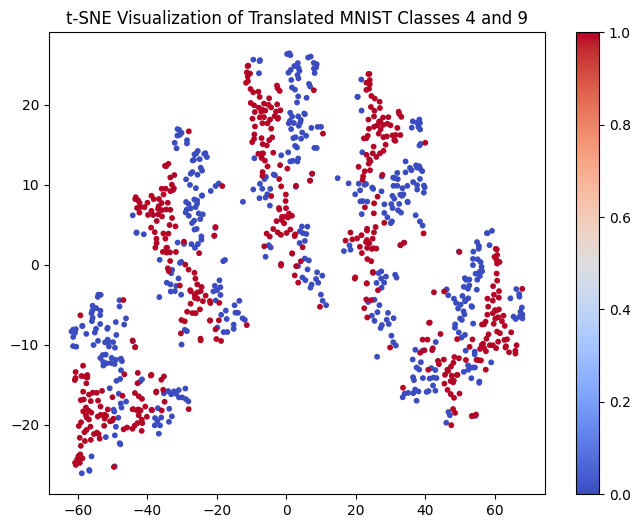

In [ ]:
translated_4_images = [class_4_images]
translated_9_images = [class_9_images]
translations = [-6, -3, 3, 6]
for translation in translations:
    translated_4_images.append(translate_images(class_4_images, translation))
    translated_9_images.append(translate_images(class_9_images, translation))

combined_images_4 = np.concatenate(translated_4_images, axis=0)
combined_images_9 = np.concatenate(translated_9_images, axis=0)
combined_labels_4 = np.concatenate([class_4_labels] * (len(translations) + 1))
combined_labels_9 = np.concatenate([class_9_labels] * (len(translations) + 1))

combined_images = np.concatenate([combined_images_4, combined_images_9], axis=0)
combined_images_ = combined_images.reshape((combined_images.shape[0], -1))

combined_labels = np.concatenate([combined_labels_4, combined_labels_9])


tsne = TSNE(n_components=2, random_state=42)
embedded_images = tsne.fit_transform(combined_images_)

plt.figure(figsize=(8, 6))
plt.scatter(embedded_images[:, 0], embedded_images[:, 1], c=combined_labels, cmap='coolwarm', s=10)
plt.title('t-SNE Visualization of Translated MNIST Classes 4 and 9')
plt.colorbar()
plt.show()


In [ ]:
print(combined_images.shape)
combined_images = combined_images.reshape(combined_images.shape[0], 28, 28, 1)
combined_images.shape

(1000, 28, 28)


(1000, 28, 28, 1)

In [ ]:
import numpy as np
from scipy.ndimage import shift
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K

X_train, X_val, y_train, y_val = train_test_split(combined_images, combined_labels, test_size=0.2, random_state=42)

In [ ]:
pairs = []
labels = []

for i in range(len(X_train)):
    for j in range(i + 1, len(X_train)):
        pairs.append([X_train[i], X_train[j]])
        if y_train[i] == y_train[j]:
            labels.append(0)
        else:
            labels.append(1)

pairs = np.array(pairs)
labels = np.array(labels)


print(pairs.size)
print(labels.size)
print(labels)


501132800
319600
[1 1 1 ... 1 1 0]


In [ ]:
print(combined_labels)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
def create_siamese_network(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (4, 4), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu')
    ])
    return model

In [ ]:
import tensorflow as tf
def contrastive_loss(y_true, y_pred):
    margin = 1
    square_pred = K.square(y_pred)
    margin_square = K.square(K.maximum(margin - y_pred, 0))
    y_true = tf.cast(y_true, dtype=tf.float32)

    return K.mean(y_true * square_pred + (1 - y_true) * margin_square)

In [ ]:
siamese_input_shape = combined_images.shape[1:]

print(siamese_input_shape)
siamese_base_network = create_siamese_network(siamese_input_shape)

input_a = layers.Input(shape=siamese_input_shape)
input_b = layers.Input(shape=siamese_input_shape)

processed_a = siamese_base_network(input_a)
processed_b = siamese_base_network(input_b)

distance = layers.Lambda(lambda x: K.abs(x[0] - x[1]))([processed_a, processed_b])

output = layers.Dense(1, activation='sigmoid')(distance)

siamese_model = models.Model(inputs=[input_a, input_b], outputs=output)

siamese_model.compile(optimizer='adam', loss=contrastive_loss)


siamese_model.fit([pairs[:, 0], pairs[:, 1]], labels, epochs=10, batch_size=64)

cnn_model = siamese_model

# cnn_output = cnn_model.predict([combined_images, combined_images])

# predicted_labels = np.argmax(cnn_output, axis=1)

# accuracy = np.mean(predicted_labels == combined_labels)

# print("Accuracy:", accuracy)


(28, 28, 1)
Epoch 1/10
4994/4994 [==============================] - 31s 5ms/step - loss: 0.0125
Epoch 2/10
4994/4994 [==============================] - 22s 4ms/step - loss: 0.0064
Epoch 3/10
4994/4994 [==============================] - 23s 5ms/step - loss: 0.0057
Epoch 4/10
4994/4994 [==============================] - 22s 4ms/step - loss: 0.0072
Epoch 5/10
4994/4994 [==============================] - 22s 4ms/step - loss: 0.0076
Epoch 6/10
4994/4994 [==============================] - 22s 4ms/step - loss: 0.0038
Epoch 7/10
4994/4994 [==============================] - 22s 4ms/step - loss: 0.0067
Epoch 8/10
4994/4994 [==============================] - 22s 4ms/step - loss: 0.0186
Epoch 9/10
4994/4994 [==============================] - 23s 5ms/step - loss: 0.0107
Epoch 10/10
4994/4994 [==============================] - 24s 5ms/step - loss: 0.0174


In [ ]:
from keras import Model

base_model = siamese_base_network
feature_extraction_model = Model(inputs=base_model.input, outputs=base_model.output)
features = feature_extraction_model.predict(combined_images)
print(features.shape)

32/32 [==============================] - 0s 5ms/step
(1000, 128)


In [ ]:
print(features)

[[   0.        0.        0.     ... 7660.0483    0.        0.    ]
 [   0.        0.        0.     ... 7630.7344    0.        0.    ]
 [   0.        0.        0.     ... 7243.3174    0.        0.    ]
 ...
 [   0.        0.        0.     ... 5512.8257 5766.713     0.    ]
 [   0.        0.        0.     ... 6959.7217 4647.02      0.    ]
 [   0.        0.        0.     ... 6863.4297 5183.749     0.    ]]


In [ ]:
print(combined_images.shape)
# print(cnn_output)

(1000, 28, 28, 1)


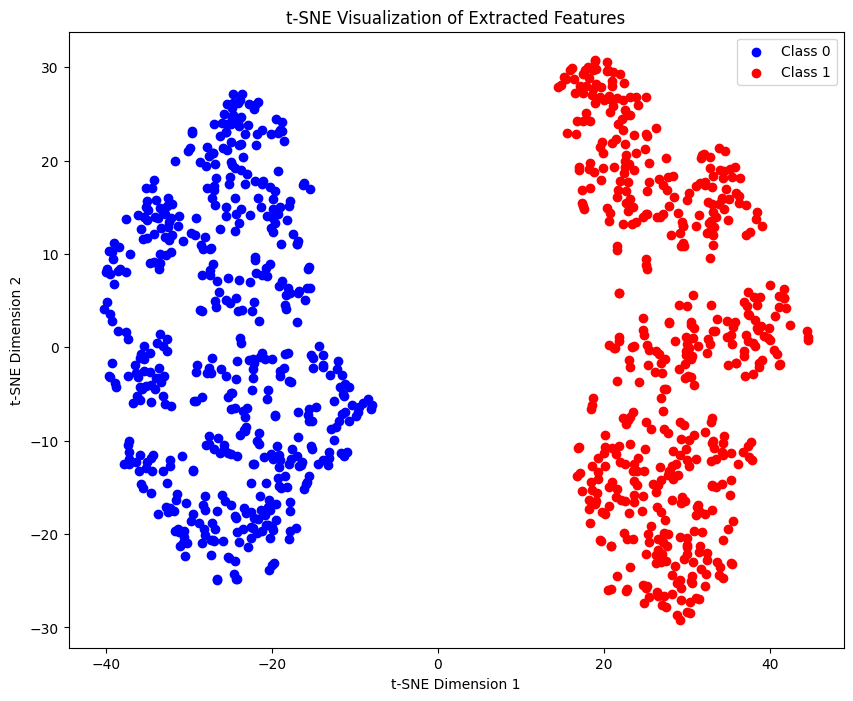

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
features_2d = tsne.fit_transform(features)

plt.figure(figsize=(10, 8))
plt.scatter(features_2d[combined_labels == 0, 0], features_2d[combined_labels == 0, 1], color='blue', label='Class 0')
plt.scatter(features_2d[combined_labels == 1, 0], features_2d[combined_labels == 1, 1], color='red', label='Class 1')
plt.title('t-SNE Visualization of Extracted Features')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()
